
##TP TADI: Scale space##
Student 1: Tosato Lucrezia

Student 2: Diez Marie


In [5]:
!wget --no-check-certificate "https://www-pequan.lip6.fr/~bereziat/cours/master/tadi/pdf/tadi-ss-pw.tgz"
!tar xvzf tadi-ss-pw.tgz

--2022-01-26 18:05:19--  https://www-pequan.lip6.fr/~bereziat/cours/master/tadi/pdf/tadi-ss-pw.tgz
Resolving www-pequan.lip6.fr (www-pequan.lip6.fr)... 132.227.74.4
Connecting to www-pequan.lip6.fr (www-pequan.lip6.fr)|132.227.74.4|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 272797 (266K) [application/x-gzip]
Saving to: ‘tadi-ss-pw.tgz’

tadi-ss-pw.tgz      100%[===================>] 266.40K   382KB/s    in 0.7s    

2022-01-26 18:05:20 (382 KB/s) - ‘tadi-ss-pw.tgz’ saved [272797/272797]

practical-work/
practical-work/c/
practical-work/c/imlib-example.c
practical-work/c/olena.jpg
practical-work/c/Makefile
practical-work/img/
practical-work/img/synpic45657.jpg
practical-work/img/fingerprint-small.jpg
practical-work/img/cameraman.jpg
practical-work/img/oyster-s1.jpg


In [6]:
%cd /content/practical-work
!pwd

/content/practical-work
/content/practical-work


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from PIL import Image
import math
import cv2
from scipy import ndimage
from tqdm import tqdm

#**Exercise 1**#
Write a code implementing the 2-D forward and centered numerical scheme of the heat equation (see
lecture, Eq. (19) slide 89, for a 1-D scheme). Space step is set to 1, time step is chosen by the user. Experiment
the CFL condition.


Heat equation : $$\frac{∂L(x,t)}{\partial t}=c \frac{\partial^{2}L(x,t)}{\partial x^2}$$
With $c=\frac{1}{2}$

Heat equation FTCS 1D : 
$$L_{j}^{n+1} = L_{j}^{n} + c \frac{Δt}{Δx^2} (L_{j+1}^{n} - 2L_{j}^{n} + L_{j-1}^{n})$$

Heat equation FTCS 2D : 
$$L_{j}^{n+1} = L_{j}^{n} + c \frac{Δt}{Δx^2} (\frac{∂^2L}{∂x^2} + \frac{∂^2L}{∂y^2}) = L_{j}^{n} + c \frac{Δt}{Δx^2} (\frac{L_{j+1,i}^{n} -2L_{j,i}^{n}+L_{j-1,i}^{n}}{Δx^2} +\frac{L_{j,i+1}^{n} -2L_{j,i}^{n}+L_{j,i-1}^{n}}{Δy^2})$$

With $Δx$ and $Δy$ the space step and $Δt$ the time step


CLF condition : 

The scheme is stable (1D) if : $c\frac{Δt}{Δx^2} < \frac{1}{2}$

The scheme is stable (2D) if : $max(c\frac{Δt}{Δx^2}, c\frac{Δt}{Δy^2}) < \frac{1}{2}$

In [ ]:
def heat_equation(L, it, dt, dx, c=1):
    height = np.shape(L)[0]
    width = np.shape(L)[1]
    
    for n in tqdm(range (1, it)):
        for i in range(1,height-1):
            for j in range(1,width-1):
                L[i][j] = L[i][j] + c*dt/dx**2 * ((L[i+1][j] -2*L[i][j]+ L[i-1][j])/dx**2 + (L[i][j+1] -2*L[i][j]+ L[i][j-1])/dx**2)
    return L

#Cameraman#

100%|██████████| 19/19 [00:21<00:00,  1.12s/it]


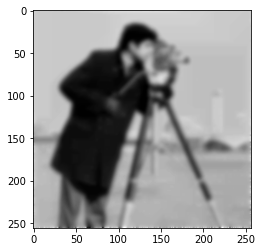

In [51]:
image = np.array(Image.open("/content/practical-work/img/cameraman.jpg").convert('L'))
#image = np.array(Image.open("/content/practical-work/img/fingerprint-small.jpg")).convert('L'))
#image =np.array(Image.open("/content/practical-work/img/oyster-s1.jpg")).convert('L'))
#image = np.array(Image.open("/content/practical-work/img/synpic45657.jpg")).convert('L'))

iter = 20
dt = 0.15
dx = 1
L = heat_equation(image, iter, dt, dx)
plt.imshow(L, cmap='gray')
plt.show()

#Exercise 2#
Write a code implementing the Perona-Malik scheme, such that given in lecture slides 111. You can use
a linear interpolation and/or the simplification given in slide 112, and compare the results.


Isotropic diffusion

$$L_{i,j}^{k+1} = L_{i,j}^{k} + Δt [cn∇_{n}L + cs∇_{s}L + ce∇_{e}L + cw∇_{w}L]_{i,j}^k$$

With :

$[\nabla_{n}L]_{i,j}^k = L_{i-1,j}^{k} -L_{i,j}^{k}$

$[\nabla_{s}L]_{i,j}^k = L_{i+1,j}^{k} -L_{i,j}^{k}$

$[\nabla_{e}L]_{i,j}^k = L_{i,j+1}^{k} -L_{i,j}^{k}$

$[\nabla_{w}L]_{i,j}^k = L_{i,j-1}^{k} -L_{i,j}^{k}$

$[c_{n}]_{i,j}^k = g_{i,j}^k$

$[c_{s}]_{i,j}^k = g_{i+1,j}^k$

$[c_{e}]_{i,j}^k = g_{i,j+1}^k$

$[c_{w}]_{i,j}^k = g_{i,j}^k$

With $g(x,y,t)^k = g(||∇L^k(x,y,t)||)$ 

* Tukey conductivity : $g = e^{-(\frac{x}{Κ})^2}$
* Lorentz conductivity : $g = \frac{1}{1+(\frac{x}{Κ})^{1+\alpha}}$

  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
100%|██████████| 20/20 [01:10<00:00,  3.54s/it]


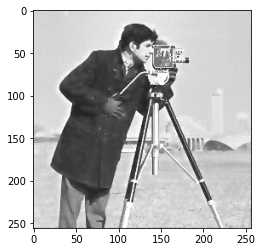

In [55]:
"""First try -- not working"""
import cv2
from scipy import ndimage

def lorentz(c, alpha, kappa):
    return 1/(1+math.pow((c/kappa), 1+alpha))

def tukey(c, kappa):
    return np.exp(-(c/kappa)**2)

def perona_malik(L, time_step, iter=10, alpha=0.15, kappa=20, conductivity="tukey"):
    for n in tqdm(range(iter)):
        #L_norm = grad(L)
        for i in range(1, L.shape[0]-1):
            for j in range(1, L.shape[1]-1):

                nablan_L = np.linalg.norm(L[i-1,j] - L[i,j])
                nablas_L = np.linalg.norm(L[i+1,j] - L[i,j])
                nablae_L = np.linalg.norm(L[i,j+1] - L[i,j])
                nablaw_L = np.linalg.norm(L[i,j-1] - L[i,j])

                if conductivity == "Lorentz" or conductivity == "lorentz":
                    cn = lorentz(nablan_L, alpha, kappa)
                    cs = lorentz(nablas_L, alpha, kappa)
                    ce = lorentz(nablae_L, alpha, kappa)
                    cw = lorentz(nablaw_L, alpha, kappa)
                else:
                    cn = tukey(nablan_L, kappa)
                    cs = tukey(nablas_L, kappa)
                    ce = tukey(nablae_L, kappa)
                    cw = tukey(nablaw_L, kappa)
                    

                coeffs = cn * nablan_L + cs * nablas_L + ce * nablae_L + cw * nablaw_L
                L[i,j] = L[i,j] + time_step * coeffs
    return L

L  = np.array(Image.open("/content/practical-work/img/cameraman.jpg").convert('L'))

dt = 0.15
L = perona_malik(L, dt, iter=20, alpha = 5, kappa=20, conductivity="lorentz")
plt.imshow(L, cmap='gray')
plt.show()


#Exercise 3#
Write a code implementing the “Edge Enhancing” scheme such that described in slides 130 and 131.



Anisotropic diffusion

$$L_{i, j}^{k+1} = L_{i, j}^{k}+ Δt [-\frac{b_{i-1, j}+b_{i, j+1}}{4} L_{i-1, j+1}^{k}+\frac{c_{i, j+1}+c_{i, j}}{2} L_{i, j+1}^{k} +\frac{b_{i+1, j}+b_{i, j+1}}{4} L_{i+1, j+1}^{k}+\frac{a_{i-1, j}+a_{i j}}{2} L_{i-1, j}^{k} - \frac{a_{i-1, j}+2 a_{i, j}+a_{i+1, j}+c_{i, j-1}+2 c_{i, j}+c_{i, j+1}}{2} L_{i, j}^{k} +\frac{a_{i+1, j}+a_{i, j}}{2} L_{i-1, j}^{k}+\frac{b_{i-1, j}+b_{i, j-1}}{4} L_{i-1, j}^{k} + \frac{c_{i, j-1}+c_{i, j}}{2} L_{i, j-1}^{k}-\frac{b_{i+1, j}+b_{i, j-1}}{4} L_{i-1, j-1}^{k}]$$

With : $L^\sigma = L \star \frac{∂G_\sigma}{∂}$

Then : $\nabla^\sigma L = ( L\star d/dx (g_\sigma), L \star d/dy (g_\sigma))$

With : 

$ a = \frac{(λ_1(L_x^\sigma)^2 + λ_2(L_y^\sigma)^2)}{||∇L^\sigma||^2}$

$ b = \frac{(λ_1 - λ_2)L_x^\sigma L_y^\sigma}{||∇L^\sigma||^2}$

$ c = \frac{(λ_2(L_x^\sigma)^2 + λ_1(L_y^\sigma)^2)}{||∇L^\sigma||^2}$

100%|██████████| 20/20 [00:24<00:00,  1.21s/it]


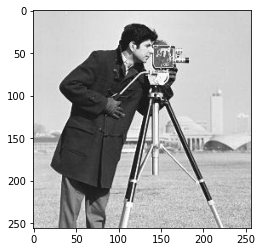

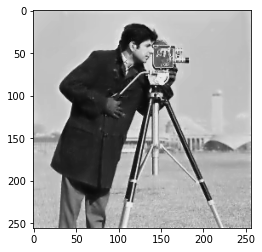

In [54]:
"""THIS ONE IS WORKING"""
from scipy.ndimage import gaussian_filter

def grad(I, sigma=2):
    L_g = gaussian_filter(I, sigma=sigma)
    GIx = ndimage.sobel(L_g, axis=0, mode='reflect')
    GIy = ndimage.sobel(L_g, axis=1, mode='reflect')
    L_g_norm = np.sum(GIx**2 + GIy**2)
    return L_g_norm, GIx, GIy

def edge_enhancing(L, time_step, sigma=2, max_n=10):
    a = np.zeros(L.shape)
    b = np.zeros(L.shape)
    c = np.zeros(L.shape)
    for n in tqdm(range(max_n)):
        L_norm=(L- L.min()) / (float)(L.max() - L.min())
        L_sigma, Lx_sigma, Ly_sigma = grad(L_norm, sigma=sigma)
        lambda2 = np.exp(-L_sigma/400**2)
        lambda1 = lambda2/5
            
        a = (lambda1*Lx_sigma**2 + lambda2*Ly_sigma**2)/(L_sigma)
        b = ((lambda1-lambda2)*Lx_sigma*Ly_sigma)/(L_sigma)
        c = (lambda2*Lx_sigma**2 + lambda1*Ly_sigma**2)/(L_sigma)
        for i in range(1, L.shape[0]-1):
            for j in range(1, L.shape[1]-1):
                coeff1 = ((b[i-1,j] + b[i,j+1])/4)*L[i-1,j+1]
                coeff2 = ((c[i,j+1] + c[i,j])/2)*L[i,j+1]
                coeff3 = ((b[i+1,j] + b[i,j+1])/4)*L[i+1,j+1]
                coeff4 = ((a[i-1,j] + a[i,j])/2)*L[i-1,j]
                coeff5 = ((a[i-1,j] + 2*a[i,j] + a[i+1,j] + c[i,j-1] + 2*c[i,j] + c[i,j+1])/2)*L[i,j]
                coeff6 = ((a[i+1,j] + a[i,j])/2)*L[i+1,j]
                coeff7 = ((b[i-1,j] + b[i,j-1])/4)*L[i-1,j]
                coeff8 = ((c[i,j-1] + c[i,j])/2)*L[i,j-1]
                coeff9 = ((b[i+1,j] + b[i,j-1])/4)*L[i+1,j-1]

                coeffs = -coeff1 + coeff2 + coeff3 + coeff4 - coeff5 + coeff6 + coeff7 + coeff8 - coeff9
                L[i,j] = L[i,j] + time_step * coeffs
    return L

L  = np.array(Image.open("/content/practical-work/img/cameraman.jpg").convert('L'))
L1  = np.array(Image.open("/content/practical-work/img/cameraman.jpg").convert('L'))
dt = 0.15
L = edge_enhancing(L, dt, sigma=10, max_n=20)
plt.imshow(L1, cmap='gray')
plt.show()
plt.imshow(L, cmap='gray')
plt.show()

#Exercise 4#
Write the 2-D heat equation using an implicit scheme. Experiment the absence of CFL condition.



Implicit scheme BTCS

1D : $-αL_{j+1}^{n+1} + (1+2\alpha)L_{j}^{n+1} - αL_{j-1}^{n+1}= L_{j}^n$

2D : $-\alpha(L_{j+1,i}^{n+1} + L_{j-1,i}^{n+1}) + (1+2\alpha+2\beta)L_{j,i}^{n+1} - \beta (L_{j,i+1}^{n+1} + L_{j,i-1}^{n+1})  = L_{j,i}^n$ 
$ \Leftrightarrow AL^{n+1} = L^n$


  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
100%|██████████| 20/20 [00:20<00:00,  1.03s/it]


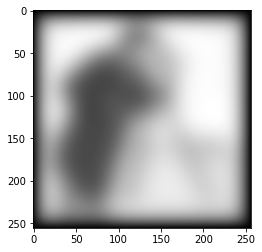

In [50]:
from scipy import sparse
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

def matrix(alpha, beta, size):
    alpha_diag = [-alpha]*size[0]*size[1]
    beta_diag = np.array([-beta]*size[0]).tolist()
    beta_diag[-1] = 0
    beta_diag = beta_diag*size[1]
    val_mid = [1 + 2*alpha + 2*beta]*size[0]*size[1]
    data = [val_mid,alpha_diag,alpha_diag,beta_diag,beta_diag]
    diags = np.array([0, -1, 1, -size[0], size[0]])
    A =spdiags(data, diags, size[0]*size[1],size[0]*size[1])
    return A

def BTCS(L, iter, alpha, beta):
  A = matrix(alpha, beta, L.shape)
  L = L.flatten()  
  for i in tqdm(range(iter)):
    L = spsolve(A, L)
  return L

L1 = np.array(Image.open("/content/practical-work/img/cameraman.jpg").convert('L'))
c=1
dt=5
L = BTCS(L1, iter=20, alpha=c*dt, beta=c*dt)

plt.imshow(L.reshape((L1.shape)), cmap='gray')
plt.show()